In [55]:
from qiskit import *

In [56]:
# create a single qubit circuit, the default initial state will be |0>
qc = QuantumCircuit(3)

In [57]:
# Apply Hadamard to 3 gates
qc.h(0)
qc.h(1)
qc.h(2)

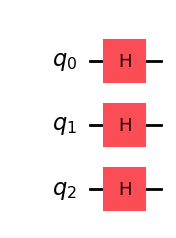

In [58]:
# Draw with MatplotLib drawer ('mpl')
qc.draw('mpl')

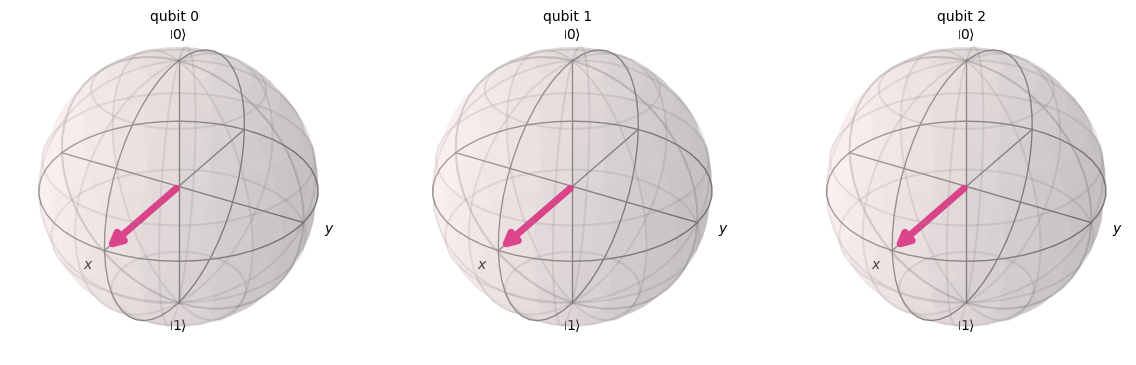

In [59]:
from qiskit.primitives import Estimator, Sampler
from qiskit_aer import StatevectorSimulator
from qiskit.visualization import plot_bloch_multivector, visualize_transition

# Run the simulation
simulator = StatevectorSimulator()
job = simulator.run([qc])
result = job.result()

dir(result)

# extract the statevector
# statevector = result.quasi_dists[0].get_statevector()
statevector = result.get_statevector()

# Plot with Bloch multivector
plot_bloch_multivector(statevector)

In [60]:

# Extract unitary matrix as a numeric numpy array
unitary_np = Operator(qc).data


In [71]:
import numpy as np
import sympy as sp

def unitary_numpy_to_sympy_latex(matrix, tolerance=1e-4):
    """
    Convert a NumPy numeric matrix to a SymPy symbolic matrix and output as LaTeX,
    simplifying known constants like sqrt(2).

    Args:
        matrix (np.ndarray): Numeric matrix (complex or real).
        tolerance (float): Tolerance for simplifying floats to symbolic expressions.

    Returns:
        sp.Matrix: SymPy matrix for further manipulation.
        str: LaTeX string of the symbolic matrix.
    """
    # Initialize empty symbolic matrix of same shape
    symbolic_matrix = sp.Matrix(matrix.shape[0], matrix.shape[1], lambda i, j: 0)

    sqrt2 = sp.sqrt(2)  # define sqrt(2) as a known constant

    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            num = matrix[i, j]
            real = np.real(num)
            imag = np.imag(num)

            # Approximate real/imaginary parts
            real_sym = sp.nsimplify(real, tolerance=tolerance, rational=True, constants=[sqrt2])
            imag_sym = sp.nsimplify(imag, tolerance=tolerance, rational=True, constants=[sqrt2])

            # Combine real and imaginary parts properly
            if not np.isclose(imag, 0, atol=tolerance):
                entry = real_sym + imag_sym * sp.I
            else:
                entry = real_sym

            # Further simplification to expose sqrt(2) if possible
            entry = sp.simplify(entry)
            symbolic_matrix[i, j] = entry

    # Generate LaTeX directly (SymPy auto wraps matrix)
    latex_str = sp.latex(symbolic_matrix)

    return symbolic_matrix, latex_str


In [72]:
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Operator
from IPython.display import display, Math

# Show with array_to_latex (fully numeric)
# array_to_latex(unitary_np, prefix="Unitary = ")
symbolic, latex = unitary_numpy_to_sympy_latex(unitary_np)
display(Math(latex))


<IPython.core.display.Math object>

In [ ]:
from qiskit.visualization import array_to_latex
import numpy as np
columnvector = np.asarray(statevector.reshape(-1, 1))
array_to_latex(columnvector, prefix="Statevector = ")

In [ ]:
# visualize_transition(qc)

In [ ]:
from qiskit_aer.primitives import Sampler
from qiskit.visualization import plot_histogram


In [ ]:

qc.measure_all()

#run the sampler
sampler = Sampler()
job = sampler.run([qc], shots=1024)
result = job.result()
# Access the counts through the quasi_dists attribute
# This returns a dictionary with bitstring integers as keys
quasi_dist = result.quasi_dists[0]

# Convert to the format expected by plot_histogram
# The keys need to be binary strings
counts_dict = {format(int(k), f'0{qc.num_clbits}b'): v * result.metadata[0].get('shots', 1024) 
               for k, v in quasi_dist.items()}

# Plot the histogram
plot_histogram(counts_dict)
